In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator


In [2]:
gini = pd.read_csv("data/gini.csv", index_col="country")

# drop all years in the future
gini.drop(columns=gini.columns[gini.columns.astype(int) > 2025], inplace=True)

# ensure values are numeric
gini[:] = gini.apply(pd.to_numeric, errors="coerce")

gini.head()


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,37.7,37.7,37.7,37.7,38.3,39.0,39.5,39.9,40.2,40.0
Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,49.4,50.3,51.3,51.3,52.1,53.0,53.8,54.3,54.7,54.4
Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.2,33.2,33.2,33.8,34.5,35.0,35.4,35.7,35.5
Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.2,35.2,35.1,35.0,35.0,35.0,35.0,35.0,35.0,35.0
UAE,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,39.7,...,28.4,27.2,26.0,26.0,26.0,26.7,27.2,27.6,27.9,27.7


In [3]:
lex = pd.read_csv("data/lex.csv", index_col="country")

# drop all years in the future
lex.drop(columns=lex.columns[lex.columns.astype(int) > 2025], inplace=True)

lex.head()


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,62.0,62.9,62.7,63.3,62.3,61.8,62.6,64.0,64.8,65.1
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,63.9,64.2,64.6,65.1,64.9,64.2,64.5,65.9,66.1,66.3
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,78.2,78.3,78.4,78.5,76.2,75.7,76.1,77.3,79.5,79.7
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.1,82.1,82.1,82.2,78.3,79.6,82.7,82.9,83.0,83.2
UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,73.4,73.5,73.7,73.9,73.2,73.0,73.4,74.6,74.8,74.9


In [4]:
regions = pd.read_csv("data/regions.csv")

# only keep relevant cols
regions = regions[["name", "four_regions"]].copy()

# set index
regions.set_index("name", inplace=True)

regions.head()


,four_regions
name,
Australia,asia
Brunei,asia
Cambodia,asia
China,asia
Fiji,asia


In [5]:
# add region col
gini = gini.join(regions.rename(columns={"four_regions": "region"}))
lex = lex.join(regions.rename(columns={"four_regions": "region"}))


In [6]:
# sort by region and country
gini_by_region = gini.sort_values(["region", "country"])
lex = lex.sort_values(["region", "country"])


In [7]:
# select numeric year columns from 1950 onwards
year_cols = gini.columns[gini.columns.str.fullmatch(r"\d{4}")]
years = year_cols[year_cols.astype(int) >= 1950]


In [8]:
# aggregate regional averages for gini and life expectancy
regional_gini = gini.groupby("region")[years].mean().stack().rename("gini")
regional_lex = lex.groupby("region")[years].mean().stack().rename("lex")

# combine into tidy dataframe and set dtypes
regional = (
    regional_gini.to_frame()
    .join(regional_lex)
    .reset_index()
    .rename(columns={"level_1": "year"})
)
regional["year"] = regional["year"].astype(int)
regional = regional.dropna(subset=["gini", "lex"])

regional.head()


,region,year,gini,lex
0,africa,1950,42.416981,44.986792
1,africa,1951,42.694340,45.105660
2,africa,1952,43.018868,45.388679
3,africa,1953,43.422642,45.647170
4,africa,1954,43.888679,45.822642


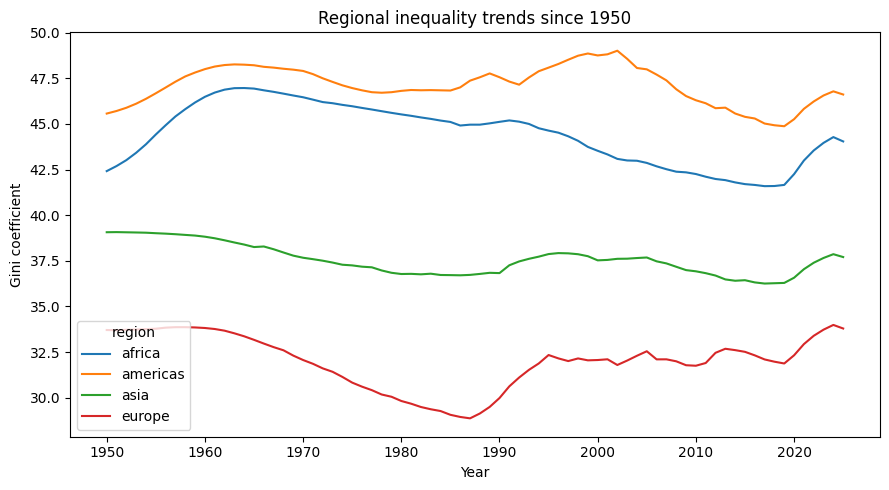

In [9]:
# plot regional inequality trend since 1950
plt.figure(figsize=(9, 5))
sns.lineplot(data=regional, x='year', y='gini', hue='region')
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xlabel('Year')
plt.ylabel('Gini coefficient')
plt.title('Regional inequality trends since 1950')
plt.tight_layout()


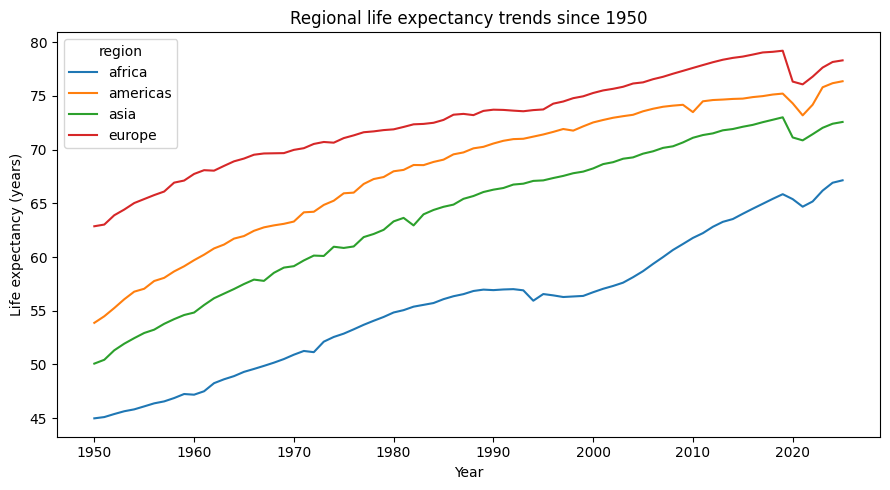

In [10]:
# plot regional life expectancy trend since 1950
plt.figure(figsize=(9, 5))
sns.lineplot(data=regional, x='year', y='lex', hue='region')
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xlabel('Year')
plt.ylabel('Life expectancy (years)')
plt.title('Regional life expectancy trends since 1950')
plt.tight_layout()


In [11]:
# compute per-region correlation between inequality and life expectancy
regional_correlation = (
    regional.groupby("region").apply(lambda df: df["gini"].corr(df["lex"])).rename("correlation")
)
regional_correlation


/var/folders/lp/7kzysnbn1qj4pr1bq9_nv7c40000gn/T/ipykernel_93008/4036749391.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional.groupby("region").apply(lambda df: df["gini"].corr(df["lex"])).rename("correlation")


region
africa     -0.633049
americas   -0.138924
asia       -0.773372
europe     -0.258438
Name: correlation, dtype: float64

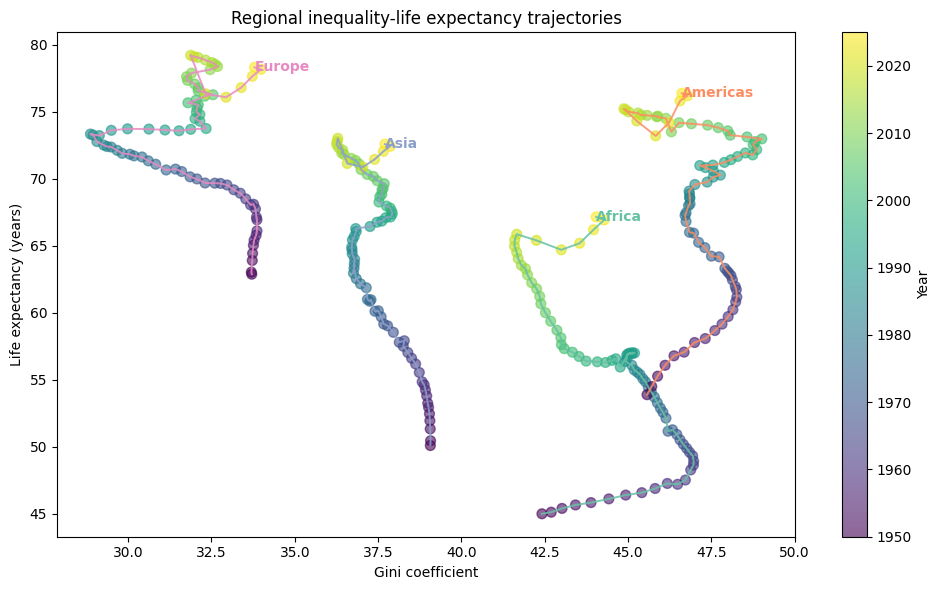

In [12]:
# visualize inequality-life expectancy trajectories with year coloring
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    regional['gini'],
    regional['lex'],
    c=regional['year'],
    cmap='viridis',
    s=50,
    alpha=0.6
)
region_palette = dict(zip(
    sorted(regional['region'].unique()),
    sns.color_palette('Set2', n_colors=regional['region'].nunique())
))
for region_name, region_slice in regional.groupby('region'):
    path = region_slice.sort_values('year')
    line_color = region_palette[region_name]
    plt.plot(path['gini'], path['lex'], color=line_color, linewidth=1.4, alpha=0.85)
    latest = path.iloc[-1]
    plt.text(
        latest['gini'],
        latest['lex'],
        region_name.title(),
        color=line_color,
        fontsize=10,
        fontweight='bold',
        ha='left',
        va='center'
    )
plt.xlabel('Gini coefficient')
plt.ylabel('Life expectancy (years)')
plt.title('Regional inequality-life expectancy trajectories')
cbar = plt.colorbar(sc)
cbar.set_label('Year')
plt.tight_layout()
